# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [1]:
!pip -q install ./python
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [2]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

state_size = env_info.vector_observations.shape[1]
agents_nb = len(env_info.agents)
action_size = brain.vector_action_space_size

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

Number of agents: 2


In [7]:
from ddpg_agent_ok import Agent, load_and_test
from workspace_utils import keep_awake
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import random
import copy
import torch

In [15]:
def ddpg(
    agent,
    n_episodes=2000,
    max_t=1500,
    print_every=100,
    gamma = 0.96,
    gamma_final = 0.99,
    gamma_rate = 0.02,
    tau = 0.008,
    tau_final = 0.001,
    tau_rate = 0.001,
    noise_scale = 1.0
    ):
    
    
    completed = False
    
    max_scores_deque = deque(maxlen = print_every)
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    max_scores = []
    avg_max_scores = []
    best_avg_max = 0.0
    best_agent_max = 0.0
    for i_episode in keep_awake(range(1, n_episodes+1),1):
        
        # Reset environment
        env_info = env.reset(train_mode=True)[brain_name]
        
        # Get next state
        state = env_info.vector_observations
        
        # state = env.reset()
        agent.reset()

        score = np.zeros(agent.num_agents)
        
        for t in range(max_t):
            
            # Get actions
            action = agent.act(state, noise_scale)
            #print(action)

            # Send actions to the environment
            env_info = env.step(action)[brain_name]
            
            # Get next state
            next_state = env_info.vector_observations
            
            # Get rewards
            reward = env_info.rewards
            
            # Check if episode is finished
            done = env_info.local_done
            
            # Make the agent proceed to the next timestep in the environment
            agent.step(state, action, reward, next_state, done, gamma, tau)
            
            # Add rewards to scores
            score += reward
            
            # Replace the current state with the next state for the next episode
            state = next_state
            
            # Exit if episode is finished
            if np.any(done):
                break
                
        #print('Total score (averaged over agents) this episode: {}'.format(np.mean(score)))
        agent_avg = np.mean(score)
        agent_max = np.max(score)
        agent_min = np.min(score)
        max_scores.append(agent_max)
        max_scores_deque.append(agent_max)         
        avg_max = np.mean(max_scores_deque)
        avg_max_scores.append(avg_max)
        #scores_deque.append(agent_avg)
        #scores.append(agent_avg)
        avg_score = np.mean(max_scores_deque)
                          
        
        if i_episode % print_every == 0:
            print('Episode {}\t\t\t AvgMax: {:.4f}'.format(i_episode, avg_max))
        
        if i_episode >=100 and not completed and avg_max > 0.5:
            completed = True
            best_avg_max = avg_max
            torch.save(agent.actor_local.state_dict(), 'actor_weights.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_weights.pth')
            print("100-episode-average max score >0.5 after {:d} episodes.\t AvgMax: {:.4f}".format(i_episode, avg_max))
        
        if completed and avg_max > best_avg_max:
            best_avg_max = avg_max
            torch.save(agent.actor_local.state_dict(), 'actor_weights_best_avg_max.pth')
            torch.save(agent.critic_local.state_dict(), 'critic_weights_best_avg_max.pth')
            print("New best 100-episode-average at Episode {:d}.\t AvgMax: {:.4f}".format(i_episode, avg_max))
        
               
        # Increase gamma discount factor. Limit to gamma_final.
        gamma = gamma_final - (1 - gamma_rate) * (gamma_final - gamma)
        
        tau = tau_final - (1 - tau_rate) * (tau_final - tau)
        
        
    torch.save(agent.actor_local.state_dict(), 'actor_final_weights.pth')
    torch.save(agent.critic_local.state_dict(), 'critic_final_weights.pth')
    return max_scores, avg_max_scores

In [16]:
agent = Agent(
    state_size = state_size,
    action_size = action_size,
    num_agents = num_agents,
    random_seed = 0,
    buffer_size = int(1e6),
    batch_size = 512, 
    lr_actor = 1e-3,
    lr_critic = 2e-3,
    noise_theta = 0.12,
    noise_sigma = 0.07,
    actor_fc1 = 164,
    actor_fc2 = 100,
    critic_fc1 = 164,
    critic_fc2 = 100,
    update_every = 15,
    num_updates = 12)

In [17]:
max_scores, avg_max_scores = ddpg(
    agent,
    n_episodes = 2000,
    max_t = 1000,
    gamma = 0.95,
    gamma_final = 0.99,
    gamma_rate = 0.02,
    tau = 0.008,
    tau_final = 0.001,
    tau_rate = 0.002,
    noise_scale = 1
)

Episode 100			 AvgMax: 0.0009
Episode 200			 AvgMax: 0.0077
Episode 300			 AvgMax: 0.0095
Episode 400			 AvgMax: 0.0811
Episode 500			 AvgMax: 0.1164
Episode 600			 AvgMax: 0.1735
100-episode-average max score >0.5 after 661 episodes.	 AvgMax: 0.5043
New best 100-episode-average at Episode 662.	 AvgMax: 0.5133
New best 100-episode-average at Episode 663.	 AvgMax: 0.5213
New best 100-episode-average at Episode 664.	 AvgMax: 0.5454
New best 100-episode-average at Episode 665.	 AvgMax: 0.5554
New best 100-episode-average at Episode 666.	 AvgMax: 0.5624
New best 100-episode-average at Episode 667.	 AvgMax: 0.5775
New best 100-episode-average at Episode 668.	 AvgMax: 0.6025
New best 100-episode-average at Episode 669.	 AvgMax: 0.6276
New best 100-episode-average at Episode 670.	 AvgMax: 0.6526
New best 100-episode-average at Episode 672.	 AvgMax: 0.6767
New best 100-episode-average at Episode 673.	 AvgMax: 0.7017
New best 100-episode-average at Episode 674.	 AvgMax: 0.7267
New best 100-epis

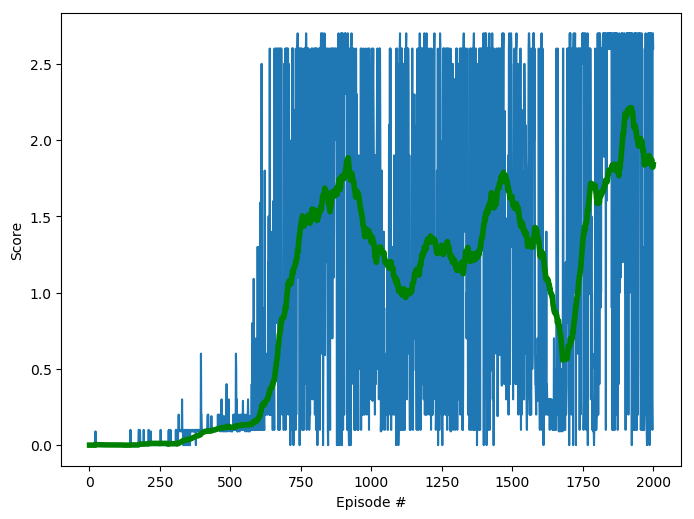

In [18]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 6), dpi=100)

plt.plot(np.arange(1, len(max_scores)+1), max_scores)
plt.plot(np.arange(1, len(max_scores)+1), avg_max_scores, 'g',linewidth=4, label='avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [19]:
env.close()